# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [133]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [134]:
# tells you which files/folders are in the folder above/1 up
!ls ..

README.md code      data


In [135]:
# pull in data sets
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [136]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [137]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

**ACT file columns**  
'Unnamed: 0':  index from when the file was last saved  
'State': full state name; 'National' is average of all states  
'Participation': percentage of students who took the exam  
'English': average score for English portion of exam  
'Math': average score for Math portion of exam  
'Reading': average score for Reading portion of exam  
'Science': average score for Science portion of exam  
'Composite': average composite score of entire exam  

**SAT file columns**  
'Unnamed: 0': index from when the file was last saved  
'State':  full state name  
'Participation': percentage of students who took the exam  
'Evidence-Based Reading and Writing': average score for Reading and Writing section of exam  
'Math': average score for Math section of exam  
'Total': average score for Total section of exam  

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data seems complete as there are no null or inappropriate (such as symbols) values in either list. There is an 'Unnamed: 0' column in both that seems to be an index, so it needs to be removed or excluded in calculations. 'Participation' in both data sets is listed as objects (probably because of the percentage sign), so they need to be converted to float.

In [138]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [139]:
# returns sum of count of null values in ACT data
act.isnull().sum().sum()

0

In [140]:
# unique values in ACT data, column Unnamed
act['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [141]:
# unique values in ACT data, column state
# data has 50 states + DC + National
act['State'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [142]:
# unique values in ACT data, column Participation
act['Participation'].unique()

array([' 60%', '100%', '65%', '62%', '31%', '18%', '32%', '73%', '55%',
       '90%', '38%', '93%', '35%', '67%', '8%', '28%', '29%', '84%',
       '34%', '66%', '98%', '75%', '40%', '23%', '21%', '80%', '45%',
       '69%'], dtype=object)

In [143]:
# unique values in ACT data, column English
act['English'].unique()

array([20.3, 18.9, 18.7, 18.6, 22.5, 20.1, 25.5, 24.1, 24.4, 19. , 21. ,
       17.8, 21.9, 22. , 21.2, 21.1, 19.6, 19.4, 24.2, 23.3, 25.4, 20.4,
       18.2, 19.8, 20.9, 16.3, 23.8, 18.5, 23.4, 24. , 17.5, 20.7, 19.5,
       23.5, 20. , 19.7])

In [144]:
# unique values in ACT data, column Math
act['Math'].unique()

array([20.7, 18.4, 19.8, 19. , 22.7, 20.3, 24.6, 23.4, 23.5, 19.4, 20.9,
       19.2, 21.8, 21.2, 22.4, 21.3, 18.8, 24. , 23.1, 25.3, 23.7, 21.5,
       18.1, 19.9, 20.2, 18. , 25.1, 23.8, 19.3, 20.4, 21.6, 23.3, 18.6,
       21.9])

In [145]:
# unique values in ACT data, column Reading
act['Reading'].unique()

array([21.4, 19.7, 20.4, 20.1, 23.1, 21.2, 25.6, 24.8, 24.9, 21. , 22. ,
       19.2, 23. , 21.6, 23.2, 22.6, 22.3, 20.5, 19.8, 24.2, 25.9, 24.5,
       21.8, 18.8, 20.8, 21.9, 18.1, 26. , 24.1, 24.6, 19.6, 22.5, 22.4,
       24.7, 19.1, 21.1, 24.4, 22.1, 20.6])

In [146]:
# unique values in ACT data, column Science
act['Science'].unique()

array([21. , 19.4, 19.9, 19.8, 19.5, 22.2, 20.9, 24.6, 23.6, 23.5, 21.3,
       19.3, 22.1, 22.3, 21.7, 20.1, 19.6, 23.7,  2.3, 24.7, 23.8, 21.6,
       18.8, 20.5, 21.5, 18.2, 24.9, 23.2, 20. , 23.9, 20.6, 22. , 23.3,
       23.4, 18.9])

In [147]:
# unique values in ACT data, column Composite
act['Composite'].unique()

array([21. , 19.2, 19.8, 19.7, 19.4, 22.8, 20.8, 25.2, 24.1, 24.2, 21.4,
       19. , 22.3, 22.6, 21.9, 21.7, 20. , 19.5, 24.3, 23.6, 25.4, 21.5,
       18.6, 20.4, 20.3, 17.8, 25.5, 23.9, 19.1, 22. , 21.8, 23.7, 24. ,
       18.7, 20.7, 23.8, 20.5, 20.2])

In [148]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [149]:
# returns sum of count of null values in SAT data
sat.isnull().sum().sum()

0

In [150]:
# unique values in SAT data, column Unnamed
sat['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [151]:
# unique values in SAT data, column State
# data includes 50 states plus DC
sat['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [152]:
# unique values in SAT data, column Participation
sat['Participation'].unique()

array(['5%', '38%', '30%', '3%', '53%', '11%', '100%', '83%', '61%',
       '55%', '93%', '9%', '63%', '2%', '4%', '95%', '69%', '76%', '10%',
       '26%', '96%', '70%', '67%', '49%', '12%', '7%', '43%', '65%',
       '71%', '50%', '62%', '60%', '64%', '14%'], dtype=object)

In [153]:
# unique values in SAT data, column Evidence-Based Reading and Writing
sat['Evidence-Based Reading and Writing'].unique()

array([593, 547, 563, 614, 531, 606, 530, 503, 482, 520, 535, 544, 513,
       559, 542, 641, 632, 631, 611, 536, 555, 509, 644, 634, 640, 605,
       629, 532, 577, 528, 546, 635, 578, 560, 540, 539, 543, 612, 623,
       624, 562, 561, 541, 558, 642, 626])

In [154]:
# unique values in SAT data, column Math
sat['Math'].unique()

array([572, 533, 553, 594, 524, 595, 512, 492, 468, 497, 515, 541, 493,
       556, 532, 635, 628, 616, 586, 499,  52, 551, 495, 651, 607, 631,
       591, 625, 520, 526, 561, 523, 535, 621, 570, 517, 548, 531, 521,
       603, 604, 507, 614, 534, 528, 649])

In [155]:
# unique values in SAT data, column Total
sat['Total'].unique()

array([1165, 1080, 1116, 1208, 1055, 1201, 1041,  996,  950, 1017, 1050,
       1085, 1005, 1115, 1074, 1275, 1260, 1247, 1198, 1012, 1060, 1107,
       1295, 1242, 1271, 1196, 1253, 1052, 1056, 1138, 1081, 1256, 1149,
       1047, 1108, 1071, 1062, 1064, 1216, 1228, 1020, 1238, 1114, 1102,
       1075, 1086, 1291, 1230])

##### 5. Print the types of each column.

In [156]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [157]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes, 'Participation' in both data sets needs to be changed from object to float. Maryland's SAT Math score was incorrectly inputted, as the state average cannot be that low of a number. Maryland's ACT Science score was also incorrectly entered.

In [158]:
# show incorrect value of Maryland's SAT Math score
sat.iloc[20,4]

52

In [159]:
# Change Maryland's SAT Math score to original value
sat.iloc[20,4] = 524

In [160]:
# show updated value of Maryland's SAT Math score
sat.iloc[20,4]

524

In [161]:
# show incorrect value for Maryland's ACT 'Science'
act.iloc[21, 6]

2.3

In [162]:
# Change Maryland's ACT Science score to correct value
act.iloc[21,6] = 23.2

In [163]:
# show updated value of Maryland's ACT Science score
act.iloc[21,6]

23.2

In [164]:
# show Participation before any editing
act['Participation'].head()

0     60%
1    100%
2     65%
3     62%
4    100%
Name: Participation, dtype: object

In [165]:
# remove %, change data type to float
act['Participation'] = act['Participation'].map(
    lambda x: float(x.replace('%', '')))

In [166]:
# show result after changes above
act['Participation'].head()

0     60.0
1    100.0
2     65.0
3     62.0
4    100.0
Name: Participation, dtype: float64

In [167]:
# show Participation before any editing
sat['Participation'].head()

0     5%
1    38%
2    30%
3     3%
4    53%
Name: Participation, dtype: object

In [168]:
# remove %, change data type to float
sat['Participation'] = sat['Participation'].map(
    lambda x: float(x.replace('%', '')))

In [169]:
# show result after changes above
sat['Participation'].head()

0     5.0
1    38.0
2    30.0
3     3.0
4    53.0
Name: Participation, dtype: float64

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [170]:
sat.head()

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5.0,593,572,1165
1,1,Alaska,38.0,547,533,1080
2,2,Arizona,30.0,563,553,1116
3,3,Arkansas,3.0,614,594,1208
4,4,California,53.0,531,524,1055


In [171]:
# create dictionary mapping SAT 'State' with its corresponding value in 'Evidence-Based Reading and Writing'
read_write_dict = dict(zip(sat['State'],
                           sat['Evidence-Based Reading and Writing']))
print(read_write_dict)

{'Alabama': 593, 'Alaska': 547, 'Arizona': 563, 'Arkansas': 614, 'California': 531, 'Colorado': 606, 'Connecticut': 530, 'Delaware': 503, 'District of Columbia': 482, 'Florida': 520, 'Georgia': 535, 'Hawaii': 544, 'Idaho': 513, 'Illinois': 559, 'Indiana': 542, 'Iowa': 641, 'Kansas': 632, 'Kentucky': 631, 'Louisiana': 611, 'Maine': 513, 'Maryland': 536, 'Massachusetts': 555, 'Michigan': 509, 'Minnesota': 644, 'Mississippi': 634, 'Missouri': 640, 'Montana': 605, 'Nebraska': 629, 'Nevada': 563, 'New Hampshire': 532, 'New Jersey': 530, 'New Mexico': 577, 'New York': 528, 'North Carolina': 546, 'North Dakota': 635, 'Ohio': 578, 'Oklahoma': 530, 'Oregon': 560, 'Pennsylvania': 540, 'Rhode Island': 539, 'South Carolina': 543, 'South Dakota': 612, 'Tennessee': 623, 'Texas': 513, 'Utah': 624, 'Vermont': 562, 'Virginia': 561, 'Washington': 541, 'West Virginia': 558, 'Wisconsin': 642, 'Wyoming': 626}


In [172]:
# create dictionary mapping SAT 'State' with its corresponding value in 'Math'
math_sat_dict = dict(zip(sat['State'], sat['Math']))
print(math_sat_dict)

{'Alabama': 572, 'Alaska': 533, 'Arizona': 553, 'Arkansas': 594, 'California': 524, 'Colorado': 595, 'Connecticut': 512, 'Delaware': 492, 'District of Columbia': 468, 'Florida': 497, 'Georgia': 515, 'Hawaii': 541, 'Idaho': 493, 'Illinois': 556, 'Indiana': 532, 'Iowa': 635, 'Kansas': 628, 'Kentucky': 616, 'Louisiana': 586, 'Maine': 499, 'Maryland': 524, 'Massachusetts': 551, 'Michigan': 495, 'Minnesota': 651, 'Mississippi': 607, 'Missouri': 631, 'Montana': 591, 'Nebraska': 625, 'Nevada': 553, 'New Hampshire': 520, 'New Jersey': 526, 'New Mexico': 561, 'New York': 523, 'North Carolina': 535, 'North Dakota': 621, 'Ohio': 570, 'Oklahoma': 517, 'Oregon': 548, 'Pennsylvania': 531, 'Rhode Island': 524, 'South Carolina': 521, 'South Dakota': 603, 'Tennessee': 604, 'Texas': 507, 'Utah': 614, 'Vermont': 551, 'Virginia': 541, 'Washington': 534, 'West Virginia': 528, 'Wisconsin': 649, 'Wyoming': 604}


In [173]:
# create dictionary mapping SAT 'State' with its corresponding value in 'Total'
total_dict = dict(zip(sat['State'], sat['Total']))
print(total_dict)

{'Alabama': 1165, 'Alaska': 1080, 'Arizona': 1116, 'Arkansas': 1208, 'California': 1055, 'Colorado': 1201, 'Connecticut': 1041, 'Delaware': 996, 'District of Columbia': 950, 'Florida': 1017, 'Georgia': 1050, 'Hawaii': 1085, 'Idaho': 1005, 'Illinois': 1115, 'Indiana': 1074, 'Iowa': 1275, 'Kansas': 1260, 'Kentucky': 1247, 'Louisiana': 1198, 'Maine': 1012, 'Maryland': 1060, 'Massachusetts': 1107, 'Michigan': 1005, 'Minnesota': 1295, 'Mississippi': 1242, 'Missouri': 1271, 'Montana': 1196, 'Nebraska': 1253, 'Nevada': 1116, 'New Hampshire': 1052, 'New Jersey': 1056, 'New Mexico': 1138, 'New York': 1052, 'North Carolina': 1081, 'North Dakota': 1256, 'Ohio': 1149, 'Oklahoma': 1047, 'Oregon': 1108, 'Pennsylvania': 1071, 'Rhode Island': 1062, 'South Carolina': 1064, 'South Dakota': 1216, 'Tennessee': 1228, 'Texas': 1020, 'Utah': 1238, 'Vermont': 1114, 'Virginia': 1102, 'Washington': 1075, 'West Virginia': 1086, 'Wisconsin': 1291, 'Wyoming': 1230}


In [174]:
act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [175]:
# create dictionary mapping ACT 'State' with its corresponding value in 'English'
eng_dict = dict(zip(act['State'], act['English']))
print(eng_dict)

{'National': 20.3, 'Alabama': 18.9, 'Alaska': 18.7, 'Arizona': 18.6, 'Arkansas': 18.9, 'California': 22.5, 'Colorado': 20.1, 'Connecticut': 25.5, 'Delaware': 24.1, 'District of Columbia': 24.4, 'Florida': 19.0, 'Georgia': 21.0, 'Hawaii': 17.8, 'Idaho': 21.9, 'Illinois': 21.0, 'Indiana': 22.0, 'Iowa': 21.2, 'Kansas': 21.1, 'Kentucky': 19.6, 'Louisiana': 19.4, 'Maine': 24.2, 'Maryland': 23.3, 'Massachusetts': 25.4, 'Michigan': 24.1, 'Minnesota': 20.4, 'Mississippi': 18.2, 'Missouri': 19.8, 'Montana': 19.0, 'Nebraska': 20.9, 'Nevada': 16.3, 'New Hampshire': 25.4, 'New Jersey': 23.8, 'New Mexico': 18.6, 'New York': 23.8, 'North Carolina': 17.8, 'North Dakota': 19.0, 'Ohio': 21.2, 'Oklahoma': 18.5, 'Oregon': 21.2, 'Pennsylvania': 23.4, 'Rhode Island': 24.0, 'South Carolina': 17.5, 'South Dakota': 20.7, 'Tennessee': 19.5, 'Texas': 19.5, 'Utah': 19.5, 'Vermont': 23.3, 'Virginia': 23.5, 'Washington': 20.9, 'West Virginia': 20.0, 'Wisconsin': 19.7, 'Wyoming': 19.4}


In [176]:
# create dictionary mapping ACT 'State' with its corresponding value in 'Math'
math_act_dict = dict(zip(act['State'], act['Math']))
print(math_act_dict)

{'National': 20.7, 'Alabama': 18.4, 'Alaska': 19.8, 'Arizona': 19.8, 'Arkansas': 19.0, 'California': 22.7, 'Colorado': 20.3, 'Connecticut': 24.6, 'Delaware': 23.4, 'District of Columbia': 23.5, 'Florida': 19.4, 'Georgia': 20.9, 'Hawaii': 19.2, 'Idaho': 21.8, 'Illinois': 21.2, 'Indiana': 22.4, 'Iowa': 21.3, 'Kansas': 21.3, 'Kentucky': 19.4, 'Louisiana': 18.8, 'Maine': 24.0, 'Maryland': 23.1, 'Massachusetts': 25.3, 'Michigan': 23.7, 'Minnesota': 21.5, 'Mississippi': 18.1, 'Missouri': 19.9, 'Montana': 20.2, 'Nebraska': 20.9, 'Nevada': 18.0, 'New Hampshire': 25.1, 'New Jersey': 23.8, 'New Mexico': 19.4, 'New York': 24.0, 'North Carolina': 19.3, 'North Dakota': 20.4, 'Ohio': 21.6, 'Oklahoma': 18.8, 'Oregon': 21.5, 'Pennsylvania': 23.4, 'Rhode Island': 23.3, 'South Carolina': 18.6, 'South Dakota': 21.5, 'Tennessee': 19.2, 'Texas': 20.7, 'Utah': 19.9, 'Vermont': 23.1, 'Virginia': 23.3, 'Washington': 21.9, 'West Virginia': 19.4, 'Wisconsin': 20.4, 'Wyoming': 19.8}


In [177]:
# create dictionary mapping ACT 'State' with its corresponding value in 'Reading'
reading_dict = dict(zip(act['State'], act['Reading']))
print(reading_dict)

{'National': 21.4, 'Alabama': 19.7, 'Alaska': 20.4, 'Arizona': 20.1, 'Arkansas': 19.7, 'California': 23.1, 'Colorado': 21.2, 'Connecticut': 25.6, 'Delaware': 24.8, 'District of Columbia': 24.9, 'Florida': 21.0, 'Georgia': 22.0, 'Hawaii': 19.2, 'Idaho': 23.0, 'Illinois': 21.6, 'Indiana': 23.2, 'Iowa': 22.6, 'Kansas': 22.3, 'Kentucky': 20.5, 'Louisiana': 19.8, 'Maine': 24.8, 'Maryland': 24.2, 'Massachusetts': 25.9, 'Michigan': 24.5, 'Minnesota': 21.8, 'Mississippi': 18.8, 'Missouri': 20.8, 'Montana': 21.0, 'Nebraska': 21.9, 'Nevada': 18.1, 'New Hampshire': 26.0, 'New Jersey': 24.1, 'New Mexico': 20.4, 'New York': 24.6, 'North Carolina': 19.6, 'North Dakota': 20.5, 'Ohio': 22.5, 'Oklahoma': 20.1, 'Oregon': 22.4, 'Pennsylvania': 24.2, 'Rhode Island': 24.7, 'South Carolina': 19.1, 'South Dakota': 22.3, 'Tennessee': 20.1, 'Texas': 21.1, 'Utah': 20.8, 'Vermont': 24.4, 'Virginia': 24.6, 'Washington': 22.1, 'West Virginia': 21.2, 'Wisconsin': 20.6, 'Wyoming': 20.8}


In [178]:
# create dictionary mapping ACT 'State' with its corresponding value in 'Science'
science_dict = dict(zip(act['State'], act['Science']))
print(science_dict)

{'National': 21.0, 'Alabama': 19.4, 'Alaska': 19.9, 'Arizona': 19.8, 'Arkansas': 19.5, 'California': 22.2, 'Colorado': 20.9, 'Connecticut': 24.6, 'Delaware': 23.6, 'District of Columbia': 23.5, 'Florida': 19.4, 'Georgia': 21.3, 'Hawaii': 19.3, 'Idaho': 22.1, 'Illinois': 21.3, 'Indiana': 22.3, 'Iowa': 22.1, 'Kansas': 21.7, 'Kentucky': 20.1, 'Louisiana': 19.6, 'Maine': 23.7, 'Maryland': 23.2, 'Massachusetts': 24.7, 'Michigan': 23.8, 'Minnesota': 21.6, 'Mississippi': 18.8, 'Missouri': 20.5, 'Montana': 20.5, 'Nebraska': 21.5, 'Nevada': 18.2, 'New Hampshire': 24.9, 'New Jersey': 23.2, 'New Mexico': 20.0, 'New York': 23.9, 'North Carolina': 19.3, 'North Dakota': 20.6, 'Ohio': 22.0, 'Oklahoma': 19.6, 'Oregon': 21.7, 'Pennsylvania': 23.3, 'Rhode Island': 23.4, 'South Carolina': 18.9, 'South Dakota': 22.0, 'Tennessee': 19.9, 'Texas': 20.9, 'Utah': 20.6, 'Vermont': 23.2, 'Virginia': 23.5, 'Washington': 22.0, 'West Virginia': 20.5, 'Wisconsin': 20.9, 'Wyoming': 20.6}


In [179]:
# create dictionary mapping ACT 'State' with its corresponding value in 'Composite'
composite_dict = dict(zip(act['State'], act['Composite']))
print(composite_dict)

{'National': 21.0, 'Alabama': 19.2, 'Alaska': 19.8, 'Arizona': 19.7, 'Arkansas': 19.4, 'California': 22.8, 'Colorado': 20.8, 'Connecticut': 25.2, 'Delaware': 24.1, 'District of Columbia': 24.2, 'Florida': 19.8, 'Georgia': 21.4, 'Hawaii': 19.0, 'Idaho': 22.3, 'Illinois': 21.4, 'Indiana': 22.6, 'Iowa': 21.9, 'Kansas': 21.7, 'Kentucky': 20.0, 'Louisiana': 19.5, 'Maine': 24.3, 'Maryland': 23.6, 'Massachusetts': 25.4, 'Michigan': 24.1, 'Minnesota': 21.5, 'Mississippi': 18.6, 'Missouri': 20.4, 'Montana': 20.3, 'Nebraska': 21.4, 'Nevada': 17.8, 'New Hampshire': 25.5, 'New Jersey': 23.9, 'New Mexico': 19.7, 'New York': 24.2, 'North Carolina': 19.1, 'North Dakota': 20.3, 'Ohio': 22.0, 'Oklahoma': 19.4, 'Oregon': 21.8, 'Pennsylvania': 23.7, 'Rhode Island': 24.0, 'South Carolina': 18.7, 'South Dakota': 21.8, 'Tennessee': 19.8, 'Texas': 20.7, 'Utah': 20.3, 'Vermont': 23.6, 'Virginia': 23.8, 'Washington': 21.9, 'West Virginia': 20.4, 'Wisconsin': 20.5, 'Wyoming': 20.2}


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [180]:
# create dict of ACT
# orient can be 'list' or 'series' to output a list or Pandas Series
act_one_dict = act.to_dict(orient='series')
print(act_one_dict)

{'Unnamed: 0': 0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
Name: Unnamed: 0, dtype: int64, 'State': 0                 National
1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17               

In [181]:
# create dict of SAT
sat_one_dict = sat.to_dict(orient='series')
print(sat_one_dict)

{'Unnamed: 0': 0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
Name: Unnamed: 0, dtype: int64, 'State': 0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky

##### 9. Merge the dataframes on the state column.

In [182]:
# remove 'Unnamed: 0' column in ACT
act = act.drop('Unnamed: 0', axis=1)

In [183]:
# remove 'Unnamed: 0' column in SAT
sat = sat.drop('Unnamed: 0', axis=1)

In [184]:
# merge dataframes on state column
merge_dict = act.merge(sat, 
                       left_on='State', 
                       right_on='State',
                       how='left')
merge_dict.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,National,60.0,20.3,20.7,21.4,21.0,21.0,NaN,NaN,NaN,NaN
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [185]:
# change names of column headers
column_map = {
    "State": "State",
    "Participation_x": "Participation_ACT",
    "English": "English_ACT",
    "Math_x": "Math_ACT",
    "Reading": "Reading_ACT",
    "Science": "Science_ACT",
    "Composite": "Composite_ACT",
    "Participation_y": "Participation_SAT",
    "Evidence-Based Reading and Writing": "Reading_Writing_SAT",
    "Math_y": "Math_SAT",
    "Total": "Total_SAT"
}

one_dict = merge_dict.rename(columns=column_map)

In [186]:
one_dict.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,National,60.0,20.3,20.7,21.4,21.0,21.0,NaN,NaN,NaN,NaN
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [187]:
# return minimum of each column
one_dict.iloc[1:].min(numeric_only=True)

Participation_ACT        8.0
English_ACT             16.3
Math_ACT                18.0
Reading_ACT             18.1
Science_ACT             18.2
Composite_ACT           17.8
Participation_SAT        2.0
Reading_Writing_SAT    482.0
Math_SAT               468.0
Total_SAT              950.0
dtype: float64

In [188]:
# return maximum of each column
one_dict.iloc[1:].max(numeric_only=True)

Participation_ACT       100.0
English_ACT              25.5
Math_ACT                 25.3
Reading_ACT              26.0
Science_ACT              24.9
Composite_ACT            25.5
Participation_SAT       100.0
Reading_Writing_SAT     644.0
Math_SAT                651.0
Total_SAT              1295.0
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [189]:
# create empty list called 'sd'
sd = list()

In [190]:
# define function to calculate standard deviation for each column
# adds function output into list 'sd'
def compute_stdev(column_name):
    stdev = one_dict[column_name].iloc[1:].std()
    sd.append(stdev)
    return 

In [191]:
# run function for each column to get standard deviation
compute_stdev('Participation_ACT')
compute_stdev('English_ACT')
compute_stdev('Math_ACT')
compute_stdev('Reading_ACT')
compute_stdev('Science_ACT')
compute_stdev('Composite_ACT')
compute_stdev('Participation_SAT')
compute_stdev('Reading_Writing_SAT')
compute_stdev('Math_SAT')
compute_stdev('Total_SAT')

In [192]:
# confirm output
sd

[32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 1.7393530462812443,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 47.12139516560329,
 92.49481172519046]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [193]:
# make sd into a dictionary so there are keys(column names) to reference when adding to 'one_dict'
sd_dict = dict(zip(one_dict.columns[1:11], sd))

print(sd_dict)

{'Participation_ACT': 32.14084201588683, 'English_ACT': 2.35367713980303, 'Math_ACT': 1.9819894936505533, 'Reading_ACT': 2.0672706264873146, 'Science_ACT': 1.7393530462812443, 'Composite_ACT': 2.020694891154341, 'Participation_SAT': 35.276632270013046, 'Reading_Writing_SAT': 45.66690138768932, 'Math_SAT': 47.12139516560329, 'Total_SAT': 92.49481172519046}


In [194]:
# add info from sd into last row of 'one_dict'
one_dict = one_dict.append(sd_dict, ignore_index=True)

In [195]:
# show newly added row (index 52)
one_dict

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
0,National,60.000000,20.300000,20.700000,21.400000,21.000000,21.000000,NaN,NaN,NaN,NaN
1,Alabama,100.000000,18.900000,18.400000,19.700000,19.400000,19.200000,5.000000,593.000000,572.000000,1165.000000
2,Alaska,65.000000,18.700000,19.800000,20.400000,19.900000,19.800000,38.000000,547.000000,533.000000,1080.000000
3,Arizona,62.000000,18.600000,19.800000,20.100000,19.800000,19.700000,30.000000,563.000000,553.000000,1116.000000
4,Arkansas,100.000000,18.900000,19.000000,19.700000,19.500000,19.400000,3.000000,614.000000,594.000000,1208.000000
5,California,31.000000,22.500000,22.700000,23.100000,22.200000,22.800000,53.000000,531.000000,524.000000,1055.000000
6,Colorado,100.000000,20.100000,20.300000,21.200000,20.900000,20.800000,11.000000,606.000000,595.000000,1201.000000
7,Connecticut,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000,100.000000,530.000000,512.000000,1041.000000
8,Delaware,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000,100.000000,503.000000,492.000000,996.000000
9,District of Columbia,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000,100.000000,482.000000,468.000000,950.000000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [196]:
# remove standard deviation row from previous problem
one_dict = one_dict.drop(52)

In [197]:
# remove 'National' row
one_dict = one_dict.drop(0)

In [198]:
# first sort by 'Participation_ACT' then 'State' in descending order
one_dict.sort_values(
    by=['Participation_ACT', 'State'], ascending=False).head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,3.0,626.0,604.0,1230.0
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642.0,649.0,1291.0
45,Utah,100.0,19.5,19.9,20.8,20.6,20.3,3.0,624.0,614.0,1238.0
43,Tennessee,100.0,19.5,19.2,20.1,19.9,19.8,5.0,623.0,604.0,1228.0
41,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543.0,521.0,1064.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [199]:
# used boolean filter to display states with 'Participation_ACT' > 50%
# then sorted the results first by 'Participation_ACT' then by 'State'
# sort is done in ascending order (default)
one_dict[one_dict['Participation_ACT']>50].sort_values(
    by=['Participation_ACT', 'State']).head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
11,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535.0,515.0,1050.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
32,New Mexico,66.0,18.6,19.4,20.4,20.0,19.7,11.0,577.0,561.0,1138.0
16,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641.0,635.0,1275.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find this link (https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.)

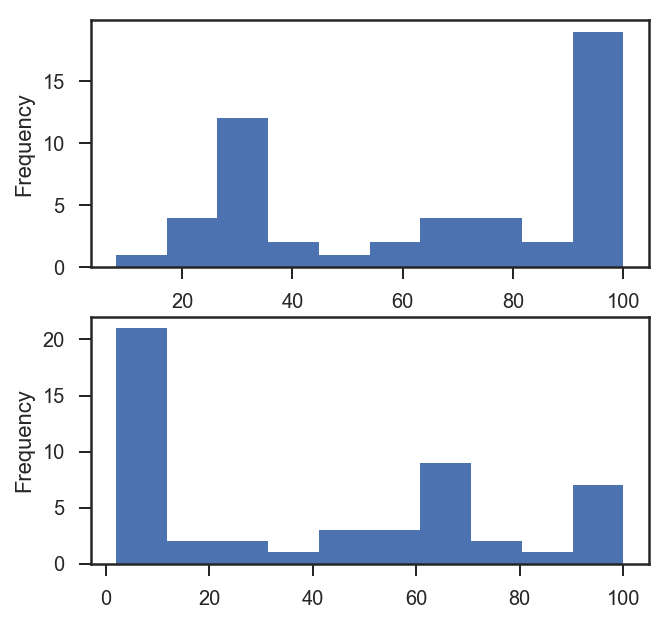

In [200]:
# set up one histogram above another
figure, ax = plt.subplots(nrows=2, ncols=1, figsize =(5,5))

# plot column data in histogram
one_dict['Participation_ACT'].plot(kind="hist", ax=ax[0])
one_dict['Participation_SAT'].plot(kind='hist', ax=ax[1]);

##### 17. Plot the Math(s) distributions from both data sets.

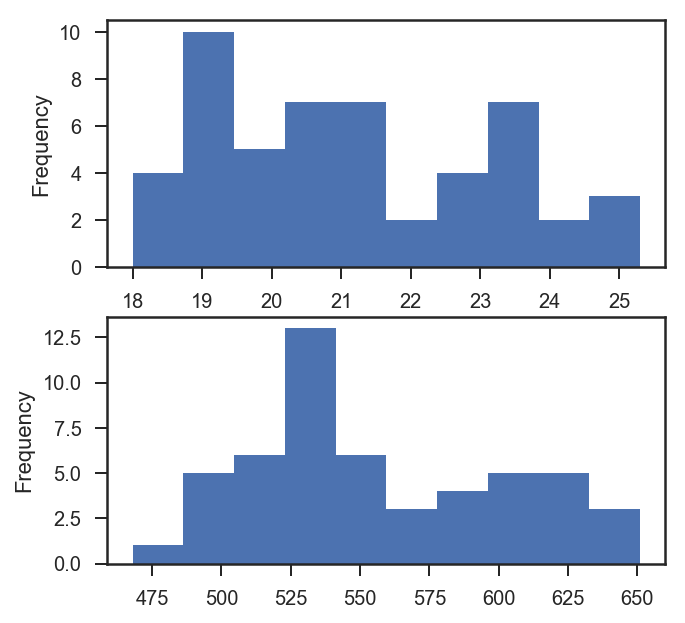

In [201]:
# set up one histogram above another
figure, ax = plt.subplots(nrows=2, ncols=1, figsize =(5,5))

# plot column data in histogram
one_dict['Math_ACT'].plot(kind="hist", ax=ax[0])
one_dict['Math_SAT'].plot(kind='hist', ax=ax[1]);

##### 18. Plot the Verbal distributions from both data sets.

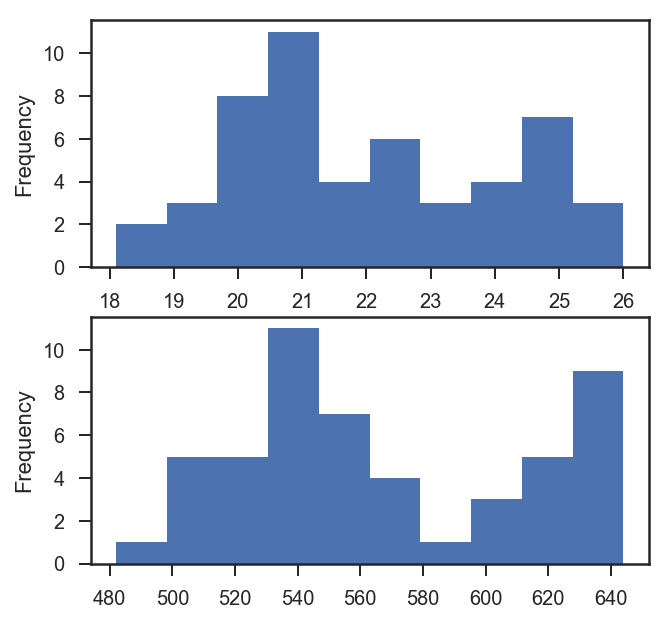

In [202]:
# set up one histogram above another
figure, ax = plt.subplots(nrows=2, ncols=1, figsize =(5,5))

# plot column data in histogram
one_dict['Reading_ACT'].plot(kind="hist", ax=ax[0])
one_dict['Reading_Writing_SAT'].plot(kind='hist', ax=ax[1]);

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

With very large data sets, the most common assumption is that the distribution will be normal.

##### 20. Does this assumption hold true for any of our columns? Which?

From a visual review of the data, none of the columns seem to be normally distributed. A review of the skew of each column shows that the skew for each category is in line with a normal distribution, but concluding that the data is normal would be inaccurate. The kurtosis values along with the overall shapes of the histograms indicate that the columns are not normally distributed.

*The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010). SPSS for Windows Step by Step: A Simple Guide and Reference, 17.0 update (10a ed.) Boston: Pearson.*

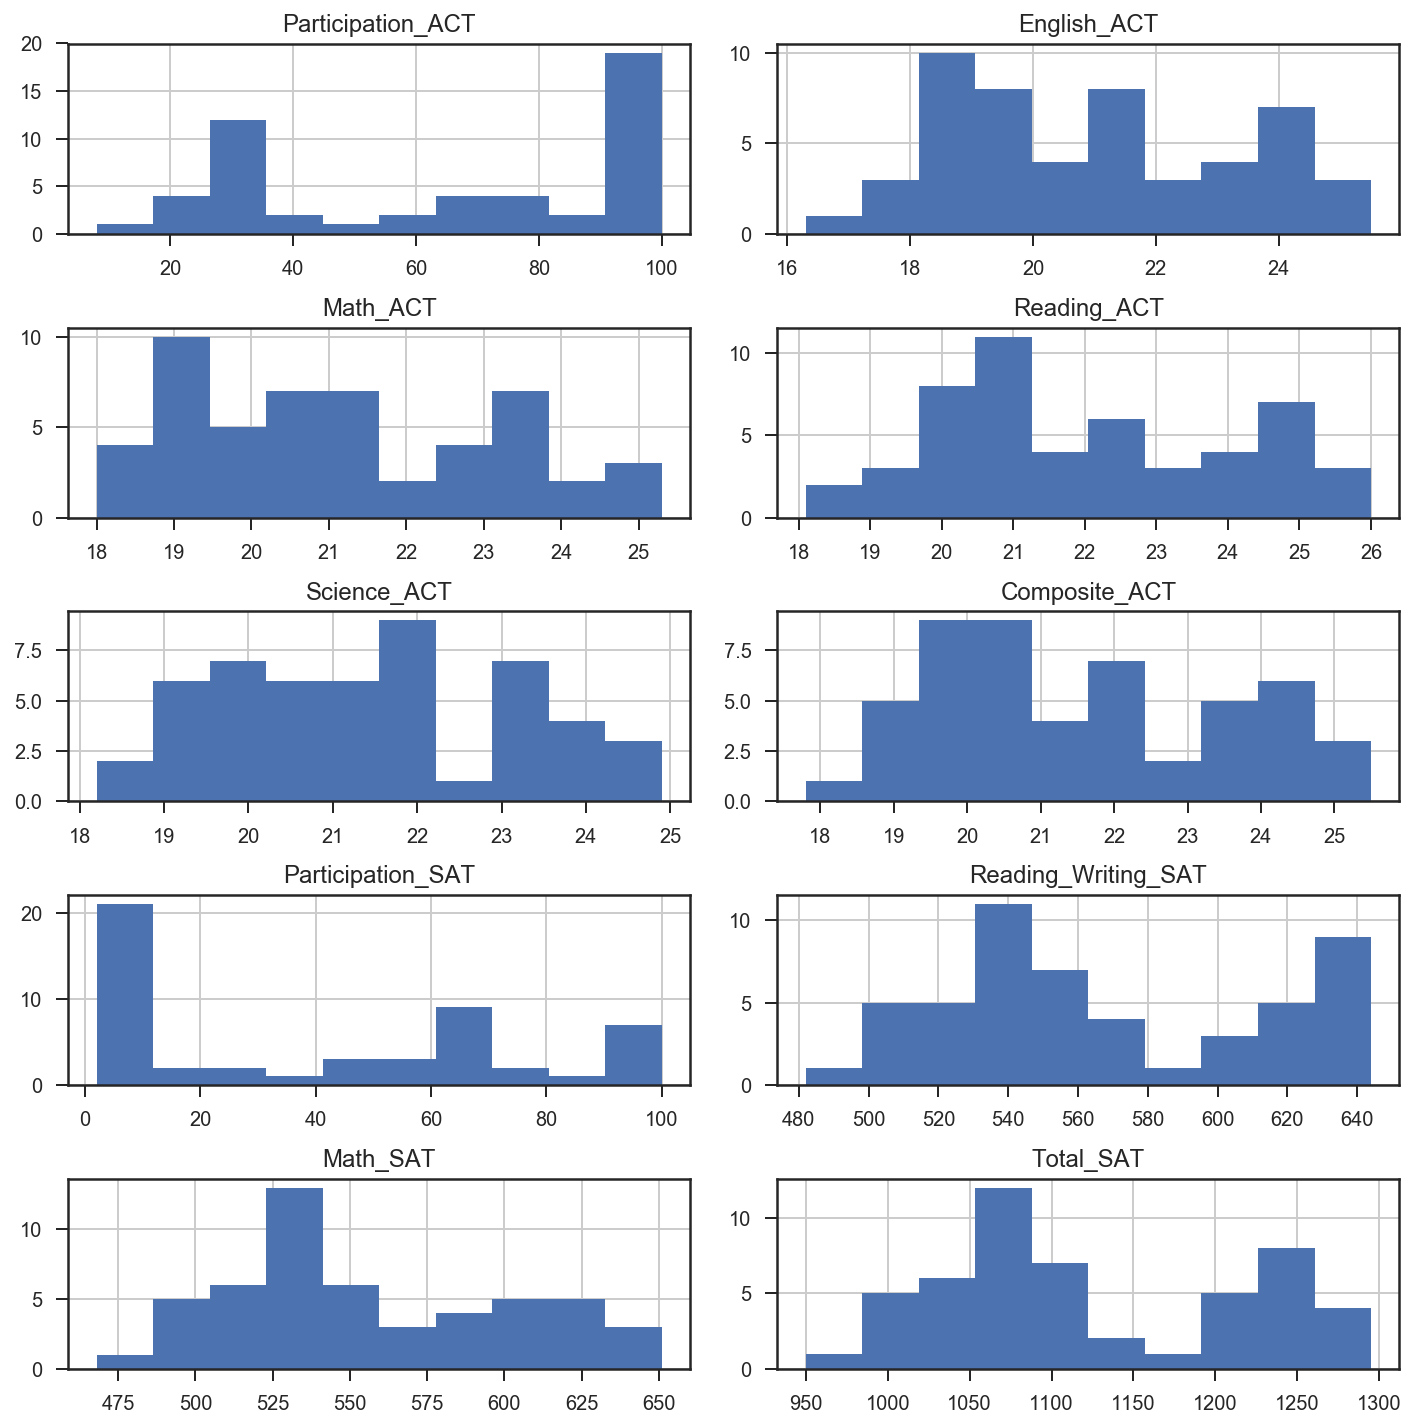

In [203]:
# plot all columns in 'one_dict' side by side
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))

one_dict.hist('Participation_ACT', ax=ax[0, 0])
one_dict.hist('English_ACT', ax=ax[0, 1])
one_dict.hist('Math_ACT', ax=ax[1, 0])
one_dict.hist('Reading_ACT', ax=ax[1, 1])
one_dict.hist('Science_ACT', ax=ax[2, 0])
one_dict.hist('Composite_ACT', ax=ax[2, 1])
one_dict.hist('Participation_SAT', ax=ax[3, 0])
one_dict.hist('Reading_Writing_SAT', ax=ax[3, 1])
one_dict.hist('Math_SAT', ax=ax[4, 0])
one_dict.hist('Total_SAT', ax=ax[4, 1])

fig.tight_layout()

In [204]:
# calculates skew of each column
one_dict.skew()

Participation_ACT     -0.197989
English_ACT            0.352660
Math_ACT               0.332683
Reading_ACT            0.269366
Science_ACT            0.218823
Composite_ACT          0.319810
Participation_SAT      0.346450
Reading_Writing_SAT    0.272693
Math_SAT               0.365040
Total_SAT              0.310903
dtype: float64

In [205]:
# calculates kurtosis of each column
one_dict.kurtosis()

Participation_ACT     -1.631970
English_ACT           -0.879307
Math_ACT              -0.979210
Reading_ACT           -0.982094
Science_ACT           -0.956033
Composite_ACT         -0.983524
Participation_SAT     -1.380695
Reading_Writing_SAT   -1.220371
Math_SAT              -0.925843
Total_SAT             -1.105461
dtype: float64

In [206]:
# look into this for future reference
# better method than skew: stats.kstest()

##### 21. Plot some scatterplots examining relationships between all variables.

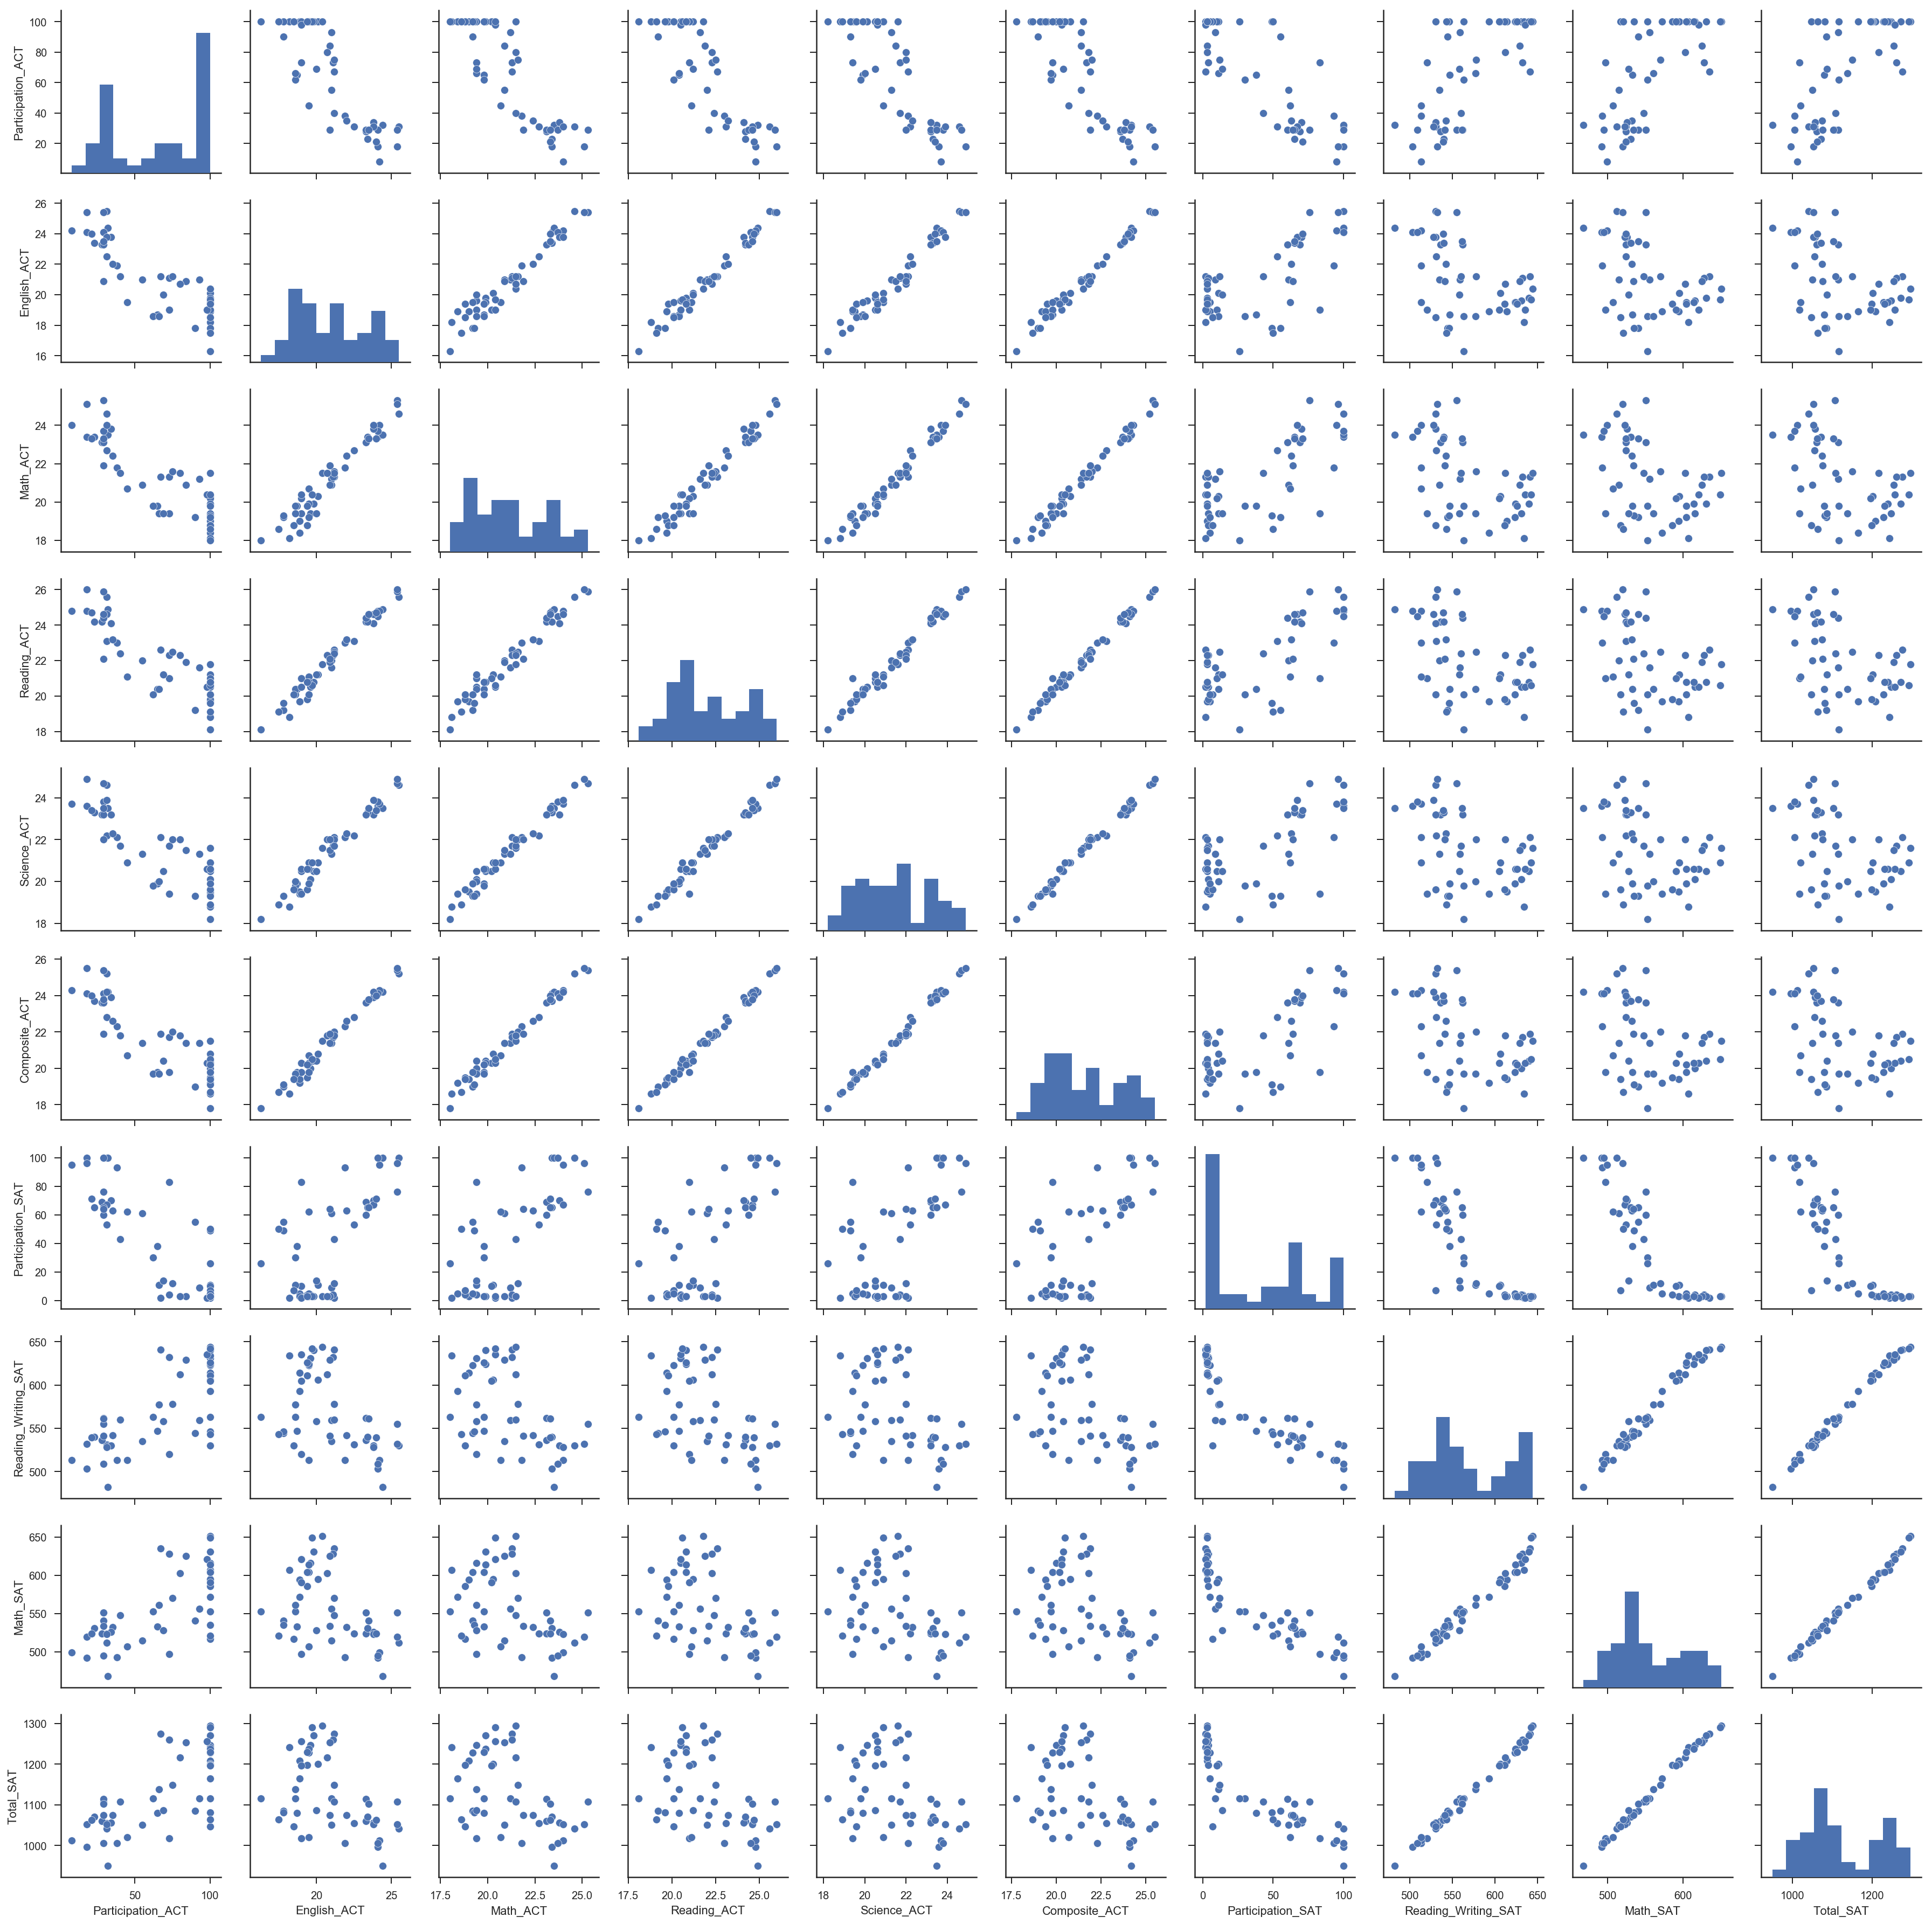

In [207]:
# create scatterplot matrix comparing all columns to each other
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(one_dict);

##### 22. Are there any interesting relationships to note?

There doesn't seem to be a correlation between ACT scores and SAT scores as the dots are randomly scattered. The participation between SAT and ACT are negatively correlated, which means that those who take the SAT are less likely to take the ACT and visa versa. Of course, higher scores in each section of the SAT result in a higher Total_SAT, as indicated by the strong positive correlations. This is also true for the sections in the ACT and the Composite_ACT value.

##### 23. Create box plots for each variable. 

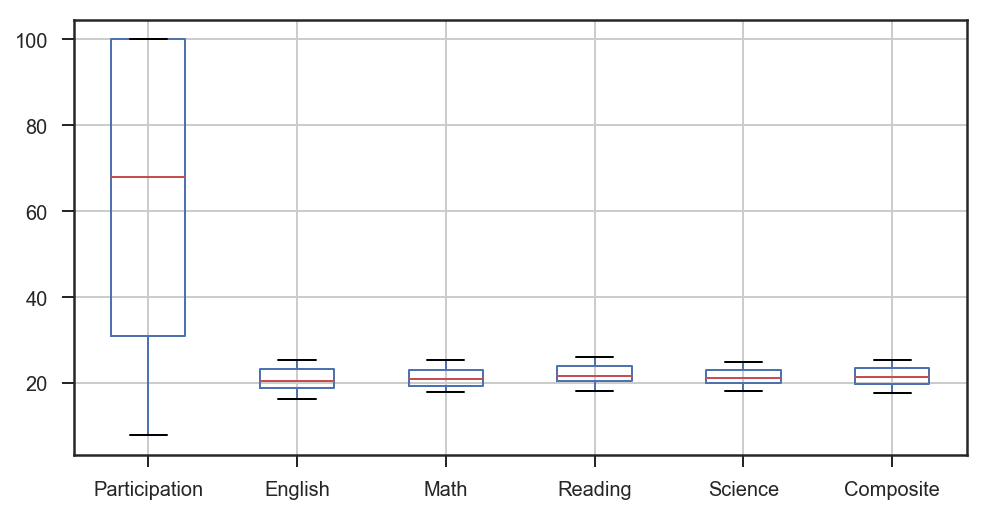

In [208]:
# boxplots of all ACT columns
act.boxplot(figsize=(8,4), fontsize=10) 

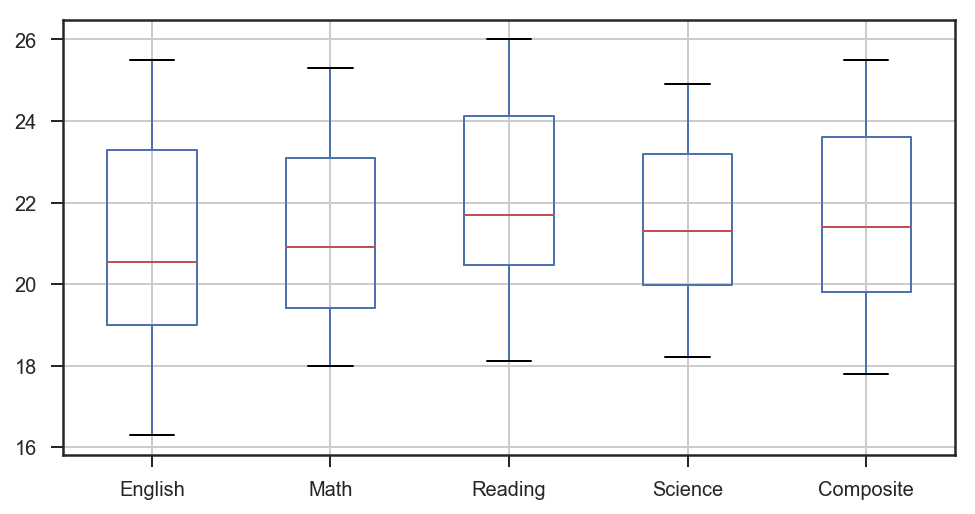

In [209]:
# boxplots of ACT columns without 'Participation' column
act.drop('Participation', axis=1).boxplot(figsize=(8,4), fontsize=10);  

# future reference: sns.boxplot(data=act, linewidth=2)

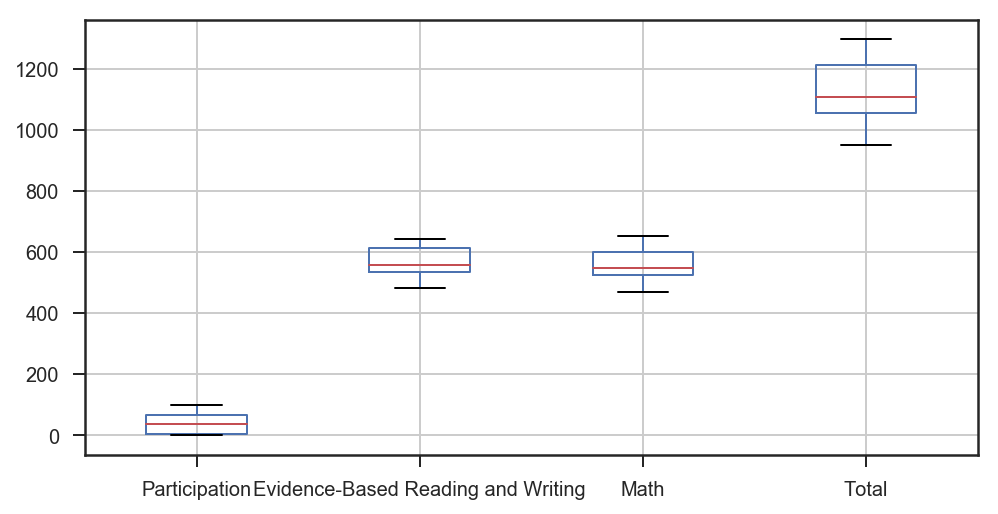

In [210]:
# boxplots of SAT columns
sat.boxplot(figsize=(8,4), fontsize=10);

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

The mean and median of each column are very similar, as indicated by the lists below, which would suggest that the data is somewhat normally distributed. However, upon review of the graphs, we see that many of these columns have multiple peaks, which is probably why when taking the mean and median values, it would seem the data is normally distributed. 

The standard deviation of each test category within ACT and SAT is very small and pretty consistent within each test, which would suggest that most students tested around the mean, but upon review of the variances, we notice that those variance values are quite large, particularly with the SAT group, which is supported by the 'bimodal' appearance of the SAT histograms.

None of the graphs are symmetric or normally distributed, and most of the graphs have multiple peaks with only one being the mode. What I do notice is that SAT scores and total tend to have the same shape, while the ACT scores and composite do not adhere to a particular pattern. 

In [211]:
# return general descriptive stats
one_dict.describe()

,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


In [212]:
# return median of each column
one_dict.median()

Participation_ACT        69.0
English_ACT              20.7
Math_ACT                 20.9
Reading_ACT              21.8
Science_ACT              21.3
Composite_ACT            21.4
Participation_SAT        38.0
Reading_Writing_SAT     559.0
Math_SAT                548.0
Total_SAT              1107.0
dtype: float64

In [213]:
# return variance of each column
one_dict.var()

Participation_ACT      1033.033725
English_ACT               5.539796
Math_ACT                  3.928282
Reading_ACT               4.273608
Science_ACT               3.025349
Composite_ACT             4.083208
Participation_SAT      1244.440784
Reading_Writing_SAT    2085.465882
Math_SAT               2220.425882
Total_SAT              8555.290196
dtype: float64

In [214]:
# calculate IQR of each column
IQR_col = one_dict.quantile(.75)-one_dict.quantile(.25)
IQR_col

Participation_ACT       69.00
English_ACT              4.30
Math_ACT                 3.70
Reading_ACT              3.70
Science_ACT              3.25
Composite_ACT            3.80
Participation_SAT       62.00
Reading_Writing_SAT     79.50
Math_SAT                75.50
Total_SAT              156.50
dtype: float64

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In addition to the analysis mentioned above regarding the scatterplots, we can also review the actual correlations between each category. As shown below, the actual ACT category scores are strongly negatively correlated with participation (of ACT). The participations of the ACT and SAT are also strongly negatively correlated, telling us that if a student took the SAT, (s)he is less likely to not have taken the ACT. Also note, that the ACT participation is medium to strongly positively correlated with the categories in the SAT, which tells us that the students who took both tests, tend to do well. The table below also tells us that the scores of those who did well in one subject (aka category) also did well in another on the same test, which is evidenced by the strong positive correlations listed below.

In [215]:
# return correlation of each column
one_dict.corr()

,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Participation_SAT,Reading_Writing_SAT,Math_SAT,Total_SAT
Participation_ACT,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.841234,0.716153,0.682572,0.701477
English_ACT,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,0.686889,-0.461345,-0.420673,-0.441947
Math_ACT,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.710697,-0.486126,-0.420456,-0.454116
Reading_ACT,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.705352,-0.488441,-0.442410,-0.466558
Science_ACT,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,0.653670,-0.422130,-0.365515,-0.394559
Composite_ACT,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,0.694748,-0.470382,-0.417817,-0.445020
Participation_SAT,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,1.000000,-0.874326,-0.855091,-0.867540
Reading_Writing_SAT,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.874326,1.000000,0.987056,0.996661
Math_SAT,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.855091,0.987056,1.000000,0.996822
Total_SAT,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.867540,0.996661,0.996822,1.000000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

H0: SAT participation rates == ACT participation rates  
H1: SAT participation rates != ACT participation rates

alpha = 0.05

In [216]:
from scipy import stats

In [217]:
# hypothesis test
stats.ttest_ind(act['Participation'],
                sat['Participation'], equal_var=False)

Ttest_indResult(statistic=3.8265392798908344, pvalue=0.00022705523742940916)

Since the p-value is 0.000227, which is smaller than our alpha, we reject the null hypothesis. We accept the alternative hypothesis, which is that the participation rates of the SAT and ACT are not the same.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [218]:
# confidence interval for ACT Participation, default alpha = 0.05
sms.DescrStatsW(act['Participation']).tconfint_mean()

(56.291616566344864, 74.01607574134746)

We can be 95% confident that the true mean of ACT Participation falls between 56.29 and 74.02.

In [219]:
# confidence interval for SAT Participation, default alpha = 0.05
sms.DescrStatsW(sat['Participation']).tconfint_mean()

(29.882208872773198, 49.725634264481705)

We can be 95% confident that the true mean of SAT Participation falls between 29.88 and 49.73.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, the answer was not surprising as there is no overlap between the two confidence intervals.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

The correlation chart above indicates that the math scores have a weak to moderate negative correlation. However, it may not be appropriate to compare the two as many of those who take the SAT do not take the ACT and visa versa. We may need to look at only a section of our data and compare only the results of students have taken both tests.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Given the data that we have, we can make some inferences regarding the relationship between SAT and ACT test takers in 2017. However, we would be limited in what we can decisively conclude as there is information we do not have that may impact results, such as any confounding variables or other variables not considered or recorded. 